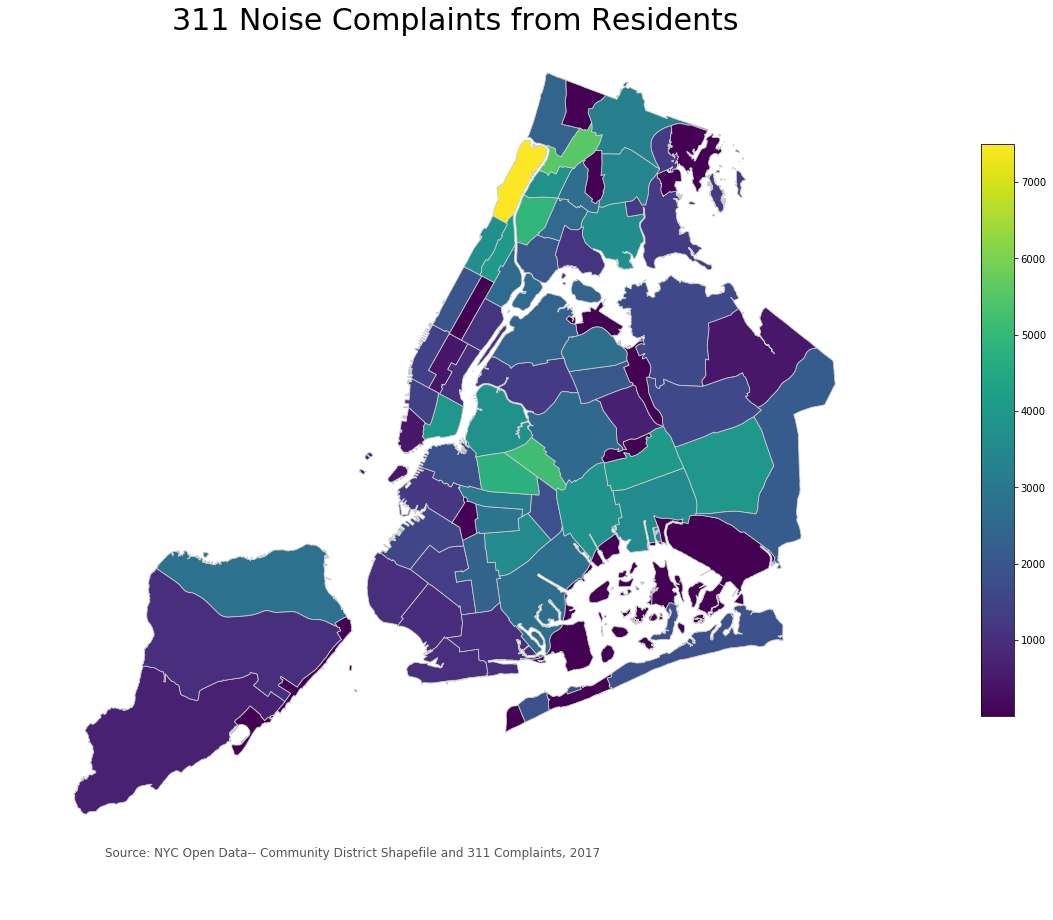

In [104]:
variable = 'complaint_count'

# setting choropleth range
vmin, vmax = 1, 7500

# adding fig and ax
fig, ax = plt.subplots(1, figsize=(15, 15))

## Removing axis labels, because lat/long don't really add anything here
ax.axis('off')

## Setting a title
ax.set_title('311 Noise Complaints from Residents', fontdict={'fontsize': '30'})

## Annotating with data source info

ax.annotate('Source: NYC Open Data-- Community District Shapefile and 311 Complaints, 2017'\
            ,xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', \
            verticalalignment='top', fontsize=12, color='#555555')

# adding legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# array for the data range
sm._A = []

# add legend
cax = fig.add_axes([1, 0.25, 0.03, 0.53])
cbar = fig.colorbar(sm, cax=cax)

cd_data.plot(column=variable, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8');

### This map shows the total count of 311 noise complaints by residents in 2017 by Community District. If you look carefully, you might see that neighborhoods that were rapidly gentrifying in that time period have the highest complaint counts.

In [1]:
## TO READ:
## CREATING DFRAMES IN LOOP--
##     https://stackoverflow.com/questions/30635145/create-multiple-dataframes-in-loop/30638956

In [52]:
import os
import json
import shapely
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [3]:
pd.options.display.max_columns = None

In [4]:
cd /nfshome/nl949/PUI2018/PUI2018_nl949/HW8_nl949

/nfshome/nl949/PUI2018/PUI2018_nl949/HW8_nl949


# Grabbing our 311 complaint data

In [5]:
url_2017 = "https://data.cityofnewyork.us/resource/fhrw-4uyv.json?complaint_type=Noise%20-%20Residential&descriptor=Loud%20Music%2FParty&$where=created_date%20BETWEEN%20'2017-01-01T00:00:00'%20AND%20'2018-01-01T00:00:00'&$limit=1000000"

In [6]:
complaints = pd.read_json(url_2017)

In [7]:
complaints.shape

(150243, 33)

In [8]:
complaints.head(5)

,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,cross_street_1,cross_street_2,descriptor,due_date,facility_type,incident_address,incident_zip,intersection_street_1,intersection_street_2,latitude,location,location_type,longitude,open_data_channel_type,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,4.015530e+09,QUEENS,ELMHURST,2017-01-01T01:43:25.000,04 QUEENS,Noise - Residential,2017-01-01T00:31:58.000,ELMHURST AVENUE,WHITNEY AVENUE,Loud Music/Party,2017-01-01T08:31:58.000,Precinct,41-11 ELBERTSON STREET,11373.0,NaN,NaN,40.746696,"{'type': 'Point', 'coordinates': [-73.87675329...",Residential Building/House,-73.876753,PHONE,QUEENS,Unspecified,2017-01-01T01:43:25.000,The Police Department responded to the complai...,Closed,ELBERTSON STREET,35136920,1018400.0,211342.0
1,ADDRESS,NYPD,New York City Police Department,3.016160e+09,BROOKLYN,BROOKLYN,2017-01-01T00:56:39.000,03 BROOKLYN,Noise - Residential,2017-01-01T00:30:06.000,STUYVESANT AVENUE,MALCOLM X BOULEVARD,Loud Music/Party,2017-01-01T08:30:06.000,Precinct,899 GREENE AVENUE,11221.0,NaN,NaN,40.690641,"{'type': 'Point', 'coordinates': [-73.93173943...",Residential Building/House,-73.931739,ONLINE,BROOKLYN,Unspecified,2017-01-01T00:56:39.000,The Police Department responded to the complai...,Closed,GREENE AVENUE,35136924,1003180.0,190903.0
2,ADDRESS,NYPD,New York City Police Department,3.046620e+09,BROOKLYN,BROOKLYN,2017-01-01T05:11:09.000,17 BROOKLYN,Noise - Residential,2017-01-01T01:43:31.000,LENOX ROAD,LINDEN BOULEVARD,Loud Music/Party,2017-01-01T09:43:31.000,Precinct,46 EAST 57 STREET,11203.0,NaN,NaN,40.655111,"{'type': 'Point', 'coordinates': [-73.92395505...",Residential Building/House,-73.923955,ONLINE,BROOKLYN,Unspecified,2017-01-01T05:11:09.000,The Police Department responded to the complai...,Closed,EAST 57 STREET,35136926,1005350.0,177960.0
3,ADDRESS,NYPD,New York City Police Department,1.015530e+09,MANHATTAN,NEW YORK,2017-01-01T04:48:14.000,08 MANHATTAN,Noise - Residential,2017-01-01T01:29:09.000,2 AVENUE,1 AVENUE,Loud Music/Party,2017-01-01T09:29:09.000,Precinct,324 EAST 91 STREET,10128.0,NaN,NaN,40.780733,"{'type': 'Point', 'coordinates': [-73.94866490...",Residential Building/House,-73.948665,ONLINE,MANHATTAN,Unspecified,2017-01-01T04:48:14.000,The Police Department responded to the complai...,Closed,EAST 91 STREET,35136951,998467.0,223723.0
4,ADDRESS,NYPD,New York City Police Department,1.021150e+09,MANHATTAN,NEW YORK,2017-01-01T08:26:40.000,12 MANHATTAN,Noise - Residential,2017-01-01T01:34:51.000,AMSTERDAM AVENUE,BROADWAY,Loud Music/Party,2017-01-01T09:34:51.000,Precinct,530 WEST 157 STREET,10032.0,NaN,NaN,40.833278,"{'type': 'Point', 'coordinates': [-73.94304122...",Residential Building/House,-73.943041,ONLINE,MANHATTAN,Unspecified,2017-01-01T08:26:40.000,The Police Department responded to the complai...,Closed,WEST 157 STREET,35136958,1000012.0,242868.0


### Let's make this into geodataframe by mapping the lat/long fields into point geometry

In [9]:
complaints['Coordinates'] = list(zip(complaints.x_coordinate_state_plane, complaints.y_coordinate_state_plane))
complaints['Coordinates'] = complaints['Coordinates'].apply(Point)

In [10]:
geocomplaints = gpd.GeoDataFrame(complaints, geometry='Coordinates')

In [13]:
geocomplaints.crs = {'init' :'epsg:2263'}

# Getting our shapefile for Community Districts

In [14]:
cd /nfshome/nl949/PUIdata/shapefiles/community_districts

/nfshome/nl949/PUIdata/shapefiles/community_districts


In [15]:
!curl -O https://data.cityofnewyork.us/api/geospatial/yfnk-k7r4?method=export&format=Shapefile

In [16]:
ls

geo_export_62cc4155-b869-4673-a32f-cfc59445130b.dbf
geo_export_62cc4155-b869-4673-a32f-cfc59445130b.prj
geo_export_62cc4155-b869-4673-a32f-cfc59445130b.shp
geo_export_62cc4155-b869-4673-a32f-cfc59445130b.shx


In [17]:
cds = gpd.read_file('/nfshome/nl949/PUIdata/shapefiles/community_districts/geo_export_62cc4155-b869-4673-a32f-cfc59445130b.shp')

In [18]:
##cds.set_index('boro_cd', inplace=True)
cds.plot()

### Spatial Joining our Complaints to our CDs

In [25]:
## make sure our CRSs line up

geocomplaints = geocomplaints.to_crs(cds.crs)

joined = gpd.sjoin(cds, geocomplaints, how='left')

In [26]:
joined.head(5)

,boro_cd,shape_area,shape_leng,geometry,index_right,address_type,agency,agency_name,bbl,borough,city,closed_date,community_board,complaint_type,created_date,cross_street_1,cross_street_2,descriptor,due_date,facility_type,incident_address,incident_zip,intersection_street_1,intersection_street_2,latitude,location,location_type,longitude,open_data_channel_type,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,status,street_name,unique_key,x_coordinate_state_plane,y_coordinate_state_plane
0,311.0,1.031778e+08,51549.557899,POLYGON ((-73.97299433938896 40.60881414180224...,4505.0,ADDRESS,NYPD,New York City Police Department,3.055600e+09,BROOKLYN,BROOKLYN,2017-01-14T04:34:29.000,11 BROOKLYN,Noise - Residential,2017-01-14T02:33:40.000,17 AVENUE,18 AVENUE,Loud Music/Party,2017-01-14T10:33:40.000,Precinct,1726 66 STREET,11204.0,NaN,NaN,40.619437,"{'type': 'Point', 'coordinates': [-73.99232752...",Residential Building/House,-73.992328,PHONE,BROOKLYN,Unspecified,2017-01-14T04:34:29.000,The Police Department responded to the complai...,Closed,66 STREET,35248625.0,986380.0,164954.0
0,311.0,1.031778e+08,51549.557899,POLYGON ((-73.97299433938896 40.60881414180224...,115891.0,ADDRESS,NYPD,New York City Police Department,3.061580e+09,BROOKLYN,BROOKLYN,2017-09-30T03:41:25.000,11 BROOKLYN,Noise - Residential,2017-09-30T01:04:00.000,NEW UTRECHT AVENUE,16 AVENUE,Loud Music/Party,2017-09-30T09:04:00.000,Precinct,1569 70 STREET,11228.0,NaN,NaN,40.619475,"{'type': 'Point', 'coordinates': [-73.99838625...",Residential Building/House,-73.998386,PHONE,BROOKLYN,Unspecified,2017-09-30T03:41:25.000,The Police Department responded to the complai...,Closed,70 STREET,37309017.0,984698.0,164968.0
0,311.0,1.031778e+08,51549.557899,POLYGON ((-73.97299433938896 40.60881414180224...,119960.0,ADDRESS,NYPD,New York City Police Department,3.061580e+09,BROOKLYN,BROOKLYN,2017-10-07T22:42:55.000,11 BROOKLYN,Noise - Residential,2017-10-07T22:36:14.000,NEW UTRECHT AVENUE,16 AVENUE,Loud Music/Party,2017-10-08T06:36:14.000,Precinct,1569 70 STREET,11228.0,NaN,NaN,40.619475,"{'type': 'Point', 'coordinates': [-73.99838625...",Residential Building/House,-73.998386,ONLINE,BROOKLYN,Unspecified,2017-10-07T22:42:55.000,The Police Department reviewed your complaint ...,Closed,70 STREET,37376775.0,984698.0,164968.0
0,311.0,1.031778e+08,51549.557899,POLYGON ((-73.97299433938896 40.60881414180224...,119726.0,ADDRESS,NYPD,New York City Police Department,3.061580e+09,BROOKLYN,BROOKLYN,2017-10-07T23:17:52.000,11 BROOKLYN,Noise - Residential,2017-10-07T22:28:58.000,NEW UTRECHT AVENUE,16 AVENUE,Loud Music/Party,2017-10-08T06:28:58.000,Precinct,1569 70 STREET,11228.0,NaN,NaN,40.619475,"{'type': 'Point', 'coordinates': [-73.99838625...",Residential Building/House,-73.998386,PHONE,BROOKLYN,Unspecified,2017-10-07T23:17:52.000,The Police Department responded to the complai...,Closed,70 STREET,37375035.0,984698.0,164968.0
0,311.0,1.031778e+08,51549.557899,POLYGON ((-73.97299433938896 40.60881414180224...,37282.0,ADDRESS,NYPD,New York City Police Department,NaN,BROOKLYN,BROOKLYN,2017-04-24T00:17:10.000,11 BROOKLYN,Noise - Residential,2017-04-23T23:40:29.000,17 AVENUE,18 AVENUE,Loud Music/Party,2017-04-24T07:40:29.000,Precinct,1751 65 STREET,11204.0,NaN,NaN,40.619818,"{'type': 'Point', 'coordinates': [-73.99130088...",Residential Building/House,-73.991301,PHONE,BROOKLYN,Unspecified,2017-04-24T00:17:10.000,The Police Department responded to the complai...,Closed,65 STREET,36010271.0,986665.0,165093.0


In [29]:
## We're up-aggregating the points by boro_cd here with .size and resetting the index to make the series into a 2 column df
cd_data = cds.merge(joined.groupby('boro_cd').size().reset_index())

In [42]:
cd_data.rename(columns={cd_data.columns[-1]: "complaint_count"}, inplace=True)

In [49]:
cd_data.complaint_count.min()

1

### Optional: Importing our (proprietary) Google Places API scraped data

In [22]:
## At work we scraped the entirety of NYC's Google Places information for a project, using it here!
places = gpd.read_file('/nfshome/nl949/PUIdata/Google Places/NYC_Places_3627.shp')

KeyboardInterrupt: 

In [ ]:
print(places.shape)
places.head(2)

In [ ]:
places[places['type_cat']=='nightlife'].head(4)

In [ ]:
places[places['type_cat']=='nightlife'].plot()